# CS 189
## Homework 1 Write up
### Submitted by Lan Dinh


In [46]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
import pandas as pd

### 2. Theory of Hard-Margin Support Vector Machines

#### 2e
The obtained parameters when fitting the linear SVM to the 2D synthetic dataset found in
toy-data.npz approximately correspond to

$w=\begin{bmatrix} -0.4528 \\ -0.5190 \end{bmatrix}$
and $α = 0.1471. (6)$


Using only matplotlib basic plotting functions, in your write-up, produce a plot of

• the data points,

• the decision boundary,

• the margins, defined as \{${x ∈ \mathbb{R}^2
: w · x + α = ±1}$\}.

In this plot, where are the support vectors?
Hint: You can use the following snippet, that plots the data points and decision boundary but
not the margins.

Ref: https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0

In [47]:
### Load toy_data.npz
toy_data = np.load("../data/toy-data.npz")
toy_training_data = toy_data["training_data"]
toy_labels = toy_data["training_labels"]


In [48]:
w = [-0.4525,-0.519]
b = 0.1471

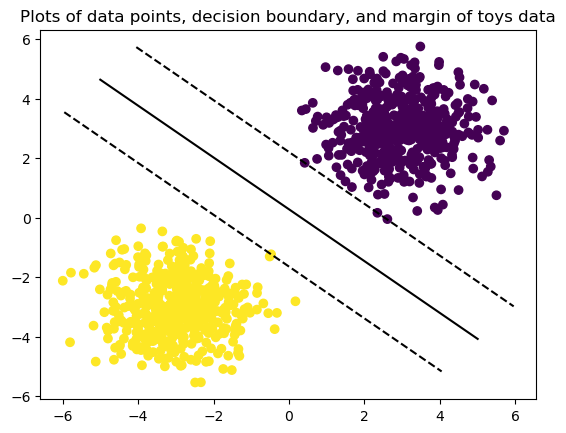

In [49]:
# Plot the decision boundary
x = np.linspace(-5, 5, 100)
y = -(w[0] * x +b) / w[1] 
plt.plot(x, y, 'k')

# Plot the margins

## Unit vector of w
w_unit = w/(np.sqrt(np.sum(np.power(w,2))))
## Margin magnitude
margin_magnitude = 1/(np.sqrt(np.sum(np.power(w,2))))


## Margin lines
margin_upper = np.array(list((zip(x,y)))) + w_unit*margin_magnitude
margin_lower = np.array(list((zip(x,y)))) - w_unit*margin_magnitude


plt.scatter(toy_training_data[:, 0], toy_training_data[:, 1], c= toy_labels)


plt.title("Plots of data points, decision boundary, and margin of toys data")
plt.plot(margin_lower[:,0], margin_lower[:,1], 'k--')
plt.plot(margin_upper[:,0], margin_upper[:,1], 'k--')

\newpage

### 3. Data Partitioning and Evaluation Metrics
#### 3a) Data partitioning

Ref: Data 100 Spring 2023 project A2

In [50]:
## set random seed
np.random.seed(42)

In [51]:
## Load mnist dataset
mnist_data = np.load("../data/mnist-data.npz")
mnist_training_data = mnist_data["training_data"]
mnist_labels = mnist_data["training_labels"]
mnist_test = mnist_data['test_data']

In [52]:
## Load spam dataset
spam_data = np.load("../data/spam-data.npz")
spam_training_data = spam_data["training_data"]
spam_labels = spam_data["training_labels"]
spam_test = spam_data['test_data']

In [53]:
### Function to split data
def split_train_val(data, labels, num_val, num_train):
    ## take arguments: 
    ## training data, label data, number of data in val set, and number of data in train set
    ## return an array of val_x, train_x, val_y, train_y

    shuffled_indices = np.random.permutation(num_train+num_val)

    val_indices = shuffled_indices[:num_val]
    train_indices = shuffled_indices[num_val:]

    val_x = data[val_indices, :].reshape(num_val, -1)
    train_x = data[train_indices, :].reshape(num_train, -1)

    val_y = labels[val_indices]
    train_y = labels[train_indices]

    return [val_x, train_x, val_y, train_y]
                    

In [54]:
## Set aside 10,000 training mnist data as a validation set 
mnist_len = mnist_training_data.shape[0]
mnist_num_val = 10000
mnist_num_train = mnist_len - mnist_num_val

mnist_split = split_train_val(mnist_training_data, mnist_labels, mnist_num_val, mnist_num_train)

mnist_val_x = mnist_split[0]
mnist_train_x = mnist_split[1]
mnist_val_y = mnist_split[2]
mnist_train_y = mnist_split[3]


In [55]:
## Set aside 20% of the training spam data as a validation set
spam_len = spam_training_data.shape[0]
spam_num_val = int(spam_len*0.2)
spam_num_train = spam_len - spam_num_val

spam_split = split_train_val(spam_training_data, spam_labels, spam_num_val, spam_num_train)

spam_val_x = spam_split[0]
spam_train_x = spam_split[1]
spam_val_y = spam_split[2]
spam_train_y = spam_split[3]

#### 3b. Evaluation metric

In [56]:
def classification_accuracy(true_y, predicted_y):
    assert len(true_y) == len(predicted_y)
    return np.sum(true_y == predicted_y)/len(true_y)

\newpage

### 4. Support Vector Machines: Coding

We will use linear Support Vector Machines (SVM) to classify our datasets. For images, we will
use the simplest of features for classification: raw pixel brightness values. In other words, our
feature vector for an image will be a row vector with all the pixel values concatenated in a row
major (or column major) order.

Train a linear SVM on the spam and MNIST datasets. For each dataset, plot the accuracy on the
training and validation sets versus the number of training examples that you used to train your
classifier. The number of training examples to use are listed for each dataset in the following parts.

You may use sklearn only for the SVM model. Everything else must be done without the use of
sklearn.

**Note:** You can use either SVC(kernel='linear') or Linear(SVC as your SVM model, though they each solve slightly different optimization problems using different libraries. On MNIST, LinearSVC was faster on one member of Course Staff's laptop, though the exact results will likely depend on your computer, the parameters of the algorithm, and the data (number of data points vs number of features)

#### 4a. 
For the MNIST dataset, use raw pixels as features. Train your model with the following numbers of training examples: 100, 200, 500, 1000, 2000, 5000, 10 000. For the largest training set, you should expect validation accuracies between 70% and 90%. When you calculate the training accuracy, you only need to calculate on the subset of the data used to train the model, not necessarily the full training dataset.

In [57]:
def svm_model(train_x, train_y, C=1.0):
    ## return svm model 
    mnist_svm_model= svm.LinearSVC(C=C)
   
    if train_x.ndim > 2:
        train_x = train_x.reshape(train_x.shape[0], -1)
    if train_y.ndim > 2:
        train_y = train_y.reshape(train_y.shape[0],-1)
    assert train_x.ndim <=2
    assert train_y.ndim <=2
    model = mnist_svm_model.fit(train_x, train_y)
    return model


In [58]:
mnist_training_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
val_accuracies = []
train_accuracies = []

for s in mnist_training_sizes:
    sample_train_x = mnist_train_x[:s]
    sample_train_y = mnist_train_y[:s]
    mnist_svm = svm_model(sample_train_x, sample_train_y)
    
    val_predicted_y = mnist_svm.predict(mnist_val_x)
    val_accuracy = classification_accuracy(mnist_val_y, val_predicted_y)
    val_accuracies.append(val_accuracy)

    train_predicted_y = mnist_svm.predict(sample_train_x)
    train_accuracy = classification_accuracy(sample_train_y, train_predicted_y)
    train_accuracies.append(train_accuracy)
    

/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


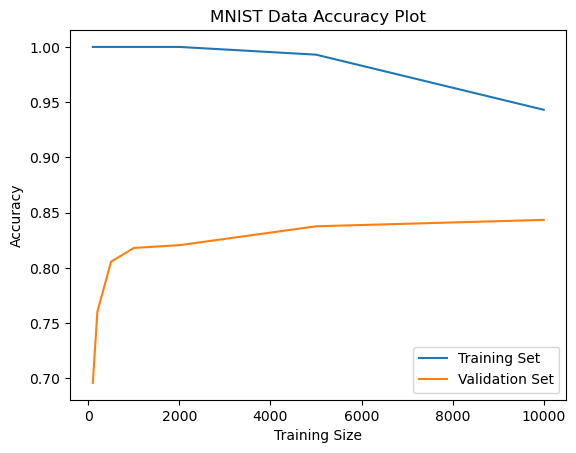

In [59]:
plt.title("MNIST Data Accuracy Plot")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.plot(mnist_training_sizes, train_accuracies, label ="Training Set")
plt.plot(mnist_training_sizes, val_accuracies, label ="Validation Set")
plt.legend()

#### 4b.
For the spam dataset, use the provided word frequencies as features. In other words, each document is represented by a vectore, where the ith entry denotes the number of times word i (as specified in featurize.py) is found in that document. Train your model with the following numbers of training examples: 100, 200, 500, 1 000, 2 000, ALL. When you calculate the training accuracy, you only need to calculate on the subset of the data used to train the model, not necessarily the full training dataset. 
For the largest training set, you should expect validation accuracies between 70% and 90%

In [60]:
spam_training_sizes = [100, 200, 500, 1000, 2000, spam_num_train]
val_accuracies = []
train_accuracies = []

for s in spam_training_sizes:
    sample_train_x = spam_train_x[:s]
    sample_train_y = spam_train_y[:s]
    spam_svm = svm_model(sample_train_x, sample_train_y)
    
    val_predicted_y = spam_svm.predict(spam_val_x)
    val_accuracy = classification_accuracy(spam_val_y, val_predicted_y)
    val_accuracies.append(val_accuracy)

    train_predicted_y = spam_svm.predict(sample_train_x)
    train_accuracy = classification_accuracy(sample_train_y, train_predicted_y)
    train_accuracies.append(train_accuracy)

/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


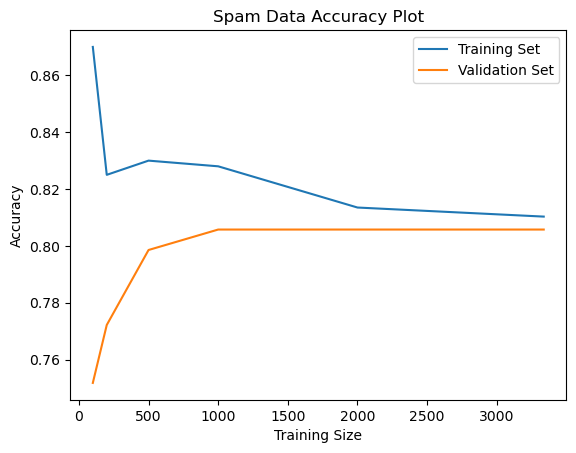

In [61]:
plt.title("Spam Data Accuracy Plot")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.plot(spam_training_sizes, train_accuracies, label ="Training Set")
plt.plot(spam_training_sizes, val_accuracies, label ="Validation Set")
plt.legend()

\newpage

### 5. Hyperparameter Tuning

In the previous problem, you learned parameters for a model that classifies the data. Many classifiers also have hyperparameters that you can tune to influence the parameters. In this problem,
we’ll determine good values for the regularization parameter C in the soft-margin SVM algorithm.
The interpretation of this parameter, as well as the functioning of the soft-margin SVM will be
covered in lecture. For now, consider C as a parameter of a black-box algorithm that we aim to
optimize.
When we are trying to choose a hyperparameter value, we train the model repeatedly with different
hyperparameters. We select the hyperparameter that gives the model with the highest accuracy on
the validation dataset. Before generating predictions for the test set, the model should be retrained
using all the labeled data (including the validation data) and the previously-determined hyperparameter.
The use of automatic hyperparameter optimization libraries is prohibited for this part of the
homework.

**Deliverable**: For the MNIST dataset, find the best C value. In your report, list at least 8 C values
you tried, the corresponding accuracies, and the best C value. You should try a geometric sequence
of C values (not an arithmetic sequence). As in the previous problem, for performance reasons,
you are required to train with at least 10,000 training examples. You can train on more if you like,
but it is not required. Again, reference any code you used to perform a hyperparameter sweep in
the code appendix.

In [62]:
## Function to tune hyperparamenter C

def hyper_tuning(x_val, x_train, y_val, y_train, C_arr):
    # return an array of corresponding accuracies on validation set
    accuracies = []
    for C in C_arr:
        model = svm_model(x_train, y_train, C)
        predicted_y = model.predict(x_val)
        accuracy = classification_accuracy(y_val, predicted_y)
        print("C: ", C, " has validation accuracy: ", accuracy)
        accuracies.append(accuracy)
    return accuracies

In [63]:
# using 10 000 mnist images for training
mnist_num_train = 10000
C_arr = np.arange(0.000001, 1, 0.1)
val_accuracies = hyper_tuning(mnist_val_x, mnist_train_x[:mnist_num_train], mnist_val_y, mnist_train_y[:mnist_num_train], C_arr)
val_accuracies

C:  1e-06  has validation accuracy:  0.8981


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.100001  has validation accuracy:  0.8403


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.200001  has validation accuracy:  0.8464


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.300001  has validation accuracy:  0.8412


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.400001  has validation accuracy:  0.853


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.500001  has validation accuracy:  0.8511


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.6000010000000001  has validation accuracy:  0.8424


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.7000010000000001  has validation accuracy:  0.8373


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.8000010000000001  has validation accuracy:  0.8263
C:  0.900001  has validation accuracy:  0.8489


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.8981, 0.8403, 0.8464, 0.8412, 0.853, 0.8511, 0.8424, 0.8373, 0.8263, 0.8489]

In [64]:
# plt.plot(C_arr, val_accuracies)

### Validation accuracy training on (total-10,000) images. C range from 0.000001 to 1 with step =0.1 

Best C= 0.000001

\newpage

### 6. K-Fold Cross-Validation

For smaller datasets (e.g., the spam dataset), the validation set contains fewer examples, and our
estimate of our accuracy might not be accurate—the estimate has high variance. A way to combat
this is to use k-fold cross-validation.

In k-fold cross-validation, the training data is shuffled and partitioned into k disjoint sets. Then the
model is trained on k − 1 sets and validated on the k
th set. This process is repeated k times with
each set chosen as the validation set once. The cross-validation accuracy we report is the accuracy
averaged over the k iterations.

**Use of automatic cross-validation libraries is prohibited for this part of the homework.**

**Deliverable:** For the spam dataset, use 5-fold cross-validation to find and report the best C value.
In your report, list at least 8 C values you tried, the corresponding accuracies, and the best C value.
Again, please include your code for cross validation or include a reference to its location in your
code appendix.

**Hint:** Effective cross-validation requires choosing from random partitions. This is best implemented by randomly shuffling your training examples and labels, then partitioning them by their
indices.

In [65]:
### Function implements k-fold-cross-validation

def k_fold_CV(features, labels, C_arr = np.array([1]), k=5):
    # shuffle indices
    assert features.shape[0] == labels.shape[0]
    data_len = labels.shape[0]
    shuffled_indices = np.random.permutation(data_len)

    # arrays of k partitions
    x_partitions = []
    y_partitions = []
    partitions_size = data_len // k

    #partition shuffled data into k folds
    for f in range(k):
        start_index = f*partitions_size
        if f == k-1:
            end_index = data_len
        else:
            end_index = (f+1)*partitions_size
        indices = shuffled_indices[start_index:end_index]
        if x.ndim > 2:
            x_partitions.append(features[indices,:].reshape(len(indices), -1))
        else:
            x_partitions.append(features[indices])
        y_partitions.append(labels[indices])
    #array of corresponding average val accuracies 
    accuracies = []
    for C in C_arr:
        val_accuracies = []
        for f in range(k):
            x_val = x_partitions[f]
            y_val = y_partitions[f]
          
            x_train = np.concatenate(x_partitions[:f] + x_partitions[f+1:], axis= 0)
            y_train = np.concatenate(y_partitions[:f] + y_partitions[f+1:], axis= 0)
            
            model = svm_model(x_train, y_train, C)
            y_predicted = model.predict(x_val)
            val_accuracy = classification_accuracy(y_val, y_predicted)
            val_accuracies.append(val_accuracy)
        avg_val_accuracy = np.mean(val_accuracies)
        accuracies.append(avg_val_accuracy)
        print("C ", C, " has mean validation accuracy: ", avg_val_accuracy)

    return accuracies
    
    

In [66]:
np.random.seed(42)
C_arr = np.arange(1, 21, 2)
# using 5-fold-CV on spam_training_data 
spam_accuracies = k_fold_CV(spam_training_data, spam_labels, C_arr, 5)
spam_accuracies

/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  1  has mean validation accuracy:  0.8103545427131348


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  3  has mean validation accuracy:  0.8093961716854061


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  5  has mean validation accuracy:  0.8101161705366244


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  7  has mean validation accuracy:  0.8113137753270439


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  9  has mean validation accuracy:  0.8151507057826792


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  11  has mean validation accuracy:  0.8079564611783627


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  13  has mean validation accuracy:  0.8134717615129453


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  15  has mean validation accuracy:  0.8153902267407631


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  17  has mean validation accuracy:  0.8141914731687704


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C  19  has mean validation accuracy:  0.8175473513404844


/srv/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.8103545427131348,
 0.8093961716854061,
 0.8101161705366244,
 0.8113137753270439,
 0.8151507057826792,
 0.8079564611783627,
 0.8134717615129453,
 0.8153902267407631,
 0.8141914731687704,
 0.8175473513404844]

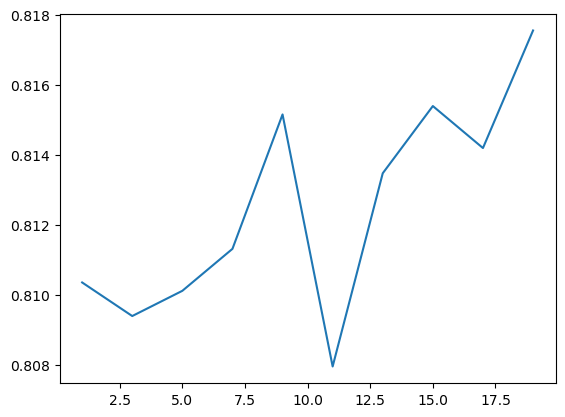

In [67]:
plt.plot(C_arr, spam_accuracies)

### 7. Kaggle

#### Spam data

#### Set up

In [68]:
## Load spam dataset
spam_data = np.load("../data/spam-data.npz")
spam_training_data = spam_data["training_data"]
spam_labels = spam_data["training_labels"]
spam_test = spam_data['test_data']

In [69]:
### Function to read spam and ham files
### Credit: function generate_design_matrix in /featurize.py

def read_file (filenames, category, storage):
    for filename in filenames:
        with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
            try:
                text = f.read() # Read in text from file
            except Exception as e:
                # skip files we have trouble reading.
                continue
            text = text.replace('\r\n', ' ') # Remove newline character
            storage.append({'Content': text, 'Category' : category})
    return storage

In [70]:
### Assign names for ham and spam file to read
### Credit: /featurize.py

from collections import defaultdict
import glob
import re
import scipy.io
import numpy as np
import pdb

NUM_TRAINING_EXAMPLES = 4172
NUM_TEST_EXAMPLES = 1000

BASE_DIR = '../data/'
SPAM_DIR = 'spam/'
HAM_DIR = 'ham/'
TEST_DIR = 'test/'

spam_filenames = glob.glob(BASE_DIR + SPAM_DIR + '*.txt')
ham_filenames = glob.glob(BASE_DIR + HAM_DIR + '*.txt')
test_filenames = [BASE_DIR + TEST_DIR + str(x) + '.txt' for x in range(NUM_TEST_EXAMPLES)]

In [71]:
spam_training = []
spam_training = read_file(spam_filenames, 1, spam_training)
spam_training = read_file(ham_filenames, 0, spam_training)

In [72]:
spam_training = pd.DataFrame(spam_training)
spam_training

,Content,Category
0,"Subject: victory at last\nwed , 09 jun 2004 13...",1
1,Subject: you pay too much for meds !\ngot a co...,1
2,"Subject: re :\nthu , 06 may 2004 04 : 17 : 35 ...",1
3,Subject: communion chimique\ngenuric ciilis ( ...,1
4,Subject: hot _ sexdifferentiable\n- - = = - ho...,1
...,...,...
4166,Subject: re : noms / actual flow for 03 / 13\n...,0
4167,Subject: tenaska iv outage update\nplease note...,0
4168,Subject: neon for march 7\nhere is next week '...,0
4169,Subject: meter 9682\ndaren do you want to bump...,0


#### Training

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(spam_training['Content'])
tfidf_matrix.shape

(4171, 43702)

In [74]:
spam_val_x, spam_train_x, spam_val_y, spam_train_y = split_train_val(tfidf_matrix, spam_training['Category'], spam_num_val, spam_num_train) 

In [75]:
spam_model = svm_model(spam_train_x, spam_train_y, 11)

#### Evaluate model 

In [76]:
spam_y_predicted = spam_model.predict(spam_val_x)

In [77]:
spam_accuracy = classification_accuracy(spam_val_y, spam_y_predicted)
spam_accuracy

0.9856115107913669

#### MNIST Data

##### Feature Engineering

Reference: 
https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

ChatGPT: question "How to implement HOG for SVM"

#### Set up

install opencv package by running the command ***pip install opencv-python***

install skimage by running the command ***pip3 install scikit-image***

In [78]:
import cv2
import numpy as np

# Parameters for HOG
winSize = (28, 28)
blockSize = (14, 14) 
blockStride = (7, 7)
cellSize = (7, 7)
nbins = 9

In [79]:
def hog_feature(image_list):
    from skimage.feature import hog
    # HOG descriptor
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)

    hog_features_list = []
    image_list_reshaped = image_list.reshape(-1, 28, 28)
    for image in image_list_reshaped:
        # OpenCV's HOG Descriptor
        if image.shape != winSize or image.dtype != np.uint8:
            image = cv2.resize(image, winSize, interpolation=cv2.INTER_LINEAR)
            image = np.uint8(image * 255)
    
        hog_features = hog.compute(image)
        hog_features_list.append(hog_features)
    
    hog_features_reshape = np.array(hog_features_list).reshape(len(image_list), -1)
    return hog_features_reshape

In [80]:
## Featurizing mnist data
mnist_train_x_hog = hog_feature(mnist_train_x)
mnist_val_x_hog = hog_feature(mnist_val_x)

#### Training

In [81]:
mnist_model = svm_model(mnist_train_x_hog, mnist_train_y)

#### Evaluate Model

In [82]:
mnist_y_predicted = mnist_model.predict(mnist_val_x_hog)

In [83]:
mnist_val_accuracy = classification_accuracy(mnist_val_y, mnist_y_predicted)
mnist_val_accuracy

0.9868

### Submission

In [84]:
# import pandas as pd
# import numpy as np

# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test, name):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv(f"{name}_submission.csv", index_label='Id')

In [85]:
### Featurize test data
## MNIST test data
mnist_test_data = hog_feature(mnist_test)

## Spam test data
spam_test = []
spam_test = read_file(test_filenames, 0, spam_test)
spam_test = pd.DataFrame(spam_test)

spam_test_tfidf_matrix = tfidf_vectorizer.transform(spam_test['Content'])


In [86]:
## Generate predicted test y
mnist_y_test = mnist_model.predict(mnist_test_data)
spam_y_test = spam_model.predict(spam_test_tfidf_matrix)

In [87]:
mnist_submitted = results_to_csv(mnist_y_test, "mnist")

In [88]:
spam_submitted = results_to_csv(spam_y_test, 'spam')